<a href="https://colab.research.google.com/github/KavyaR76/KavyaR76/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load dataset
data = pd.read_csv("LoanApprovalPrediction.csv")
data.head(5)


Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Drop the Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)


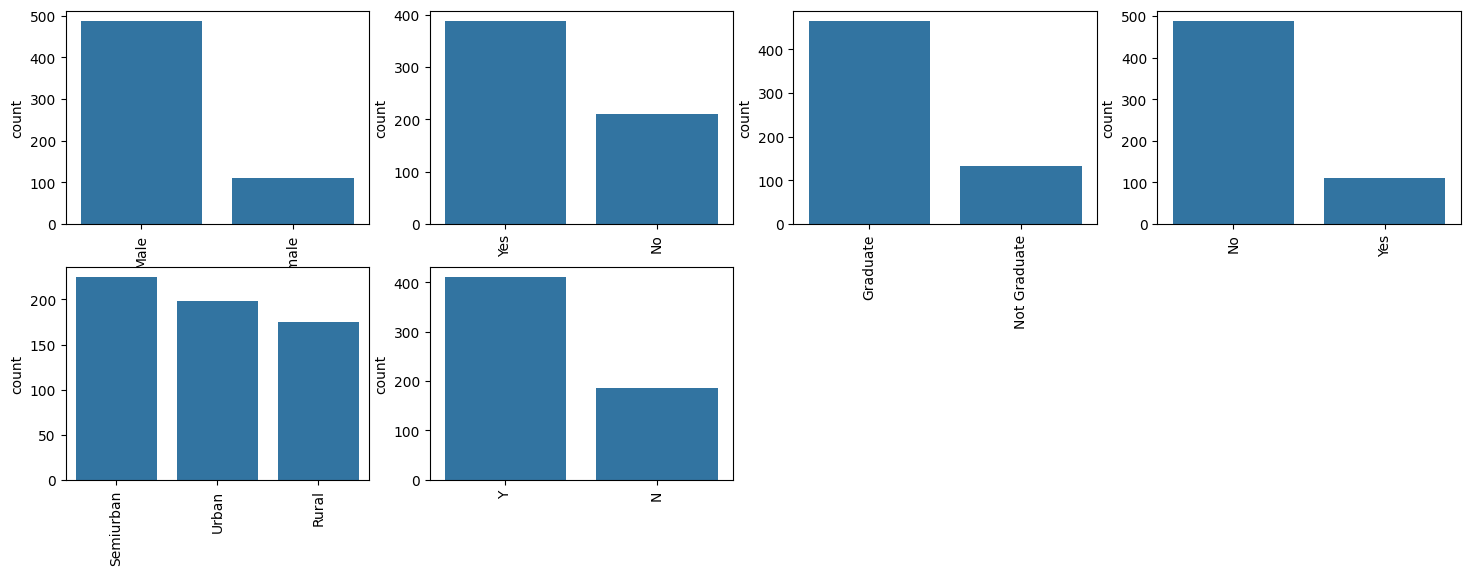

In [ ]:
# Plot unique values for categorical features
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
plt.show()


In [ ]:
# Label encoding
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [ ]:
# Fill missing values
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

# Verify there are no missing values
print(data.isna().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


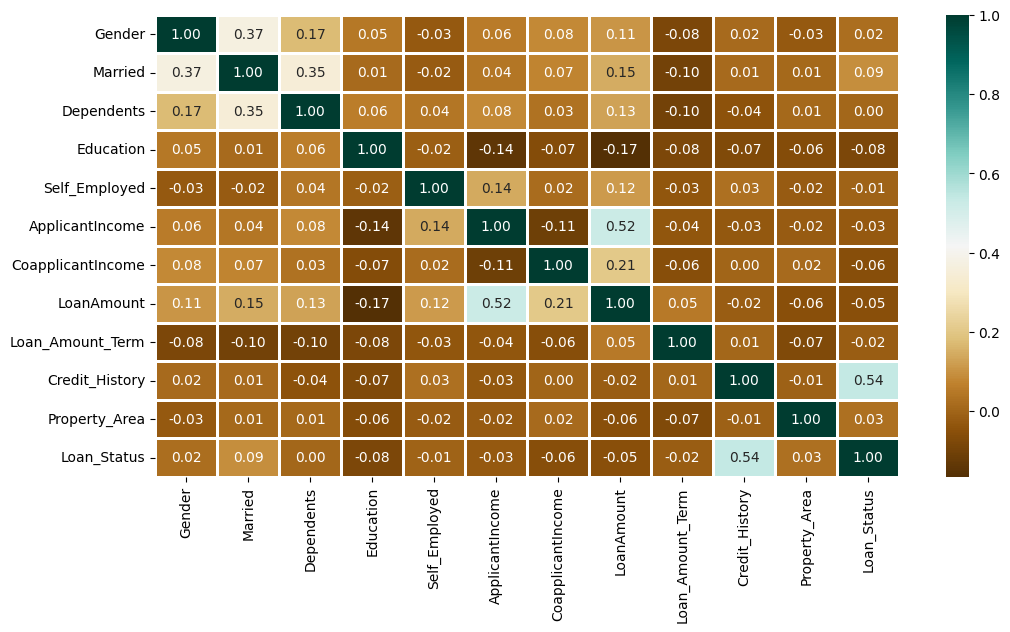

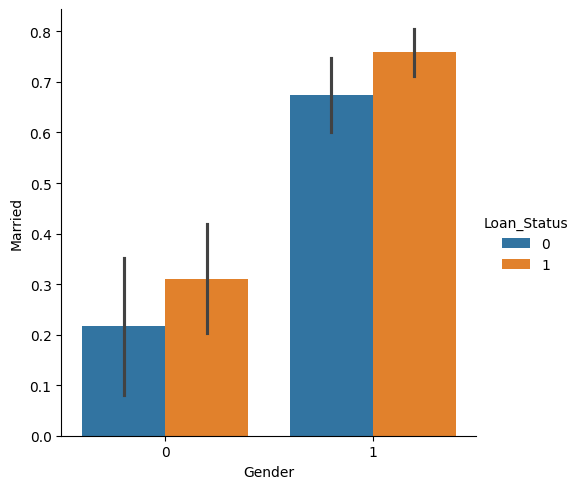

In [ ]:
# Plot heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

# Plot categorical data
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data)
plt.show()


In [ ]:
# Split data into features and target
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)


In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()

# Train and evaluate models on training data
print("Training Accuracy Scores:")
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print(f"Accuracy score of {clf.__class__.__name__} on training data: {100*metrics.accuracy_score(Y_train, Y_pred):.2f}%")

# Evaluate models on testing data
print("\nTesting Accuracy Scores:")
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"Accuracy score of {clf.__class__.__name__} on testing data: {100*metrics.accuracy_score(Y_test, Y_pred):.2f}%")


Training Accuracy Scores:
Accuracy score of RandomForestClassifier on training data: 98.04%
Accuracy score of KNeighborsClassifier on training data: 81.28%
Accuracy score of SVC on training data: 81.01%
Accuracy score of LogisticRegression on training data: 80.45%

Testing Accuracy Scores:
Accuracy score of RandomForestClassifier on testing data: 82.50%
Accuracy score of KNeighborsClassifier on testing data: 76.67%
Accuracy score of SVC on testing data: 81.25%
Accuracy score of LogisticRegression on testing data: 82.08%
